<a href="https://colab.research.google.com/github/Lotfullah21/Machine-Learning/blob/main/Co2_Emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [186]:
import numpy as np
from scipy import sparse
import pandas as pd
import sklearn
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE, MDS, Isomap
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import time
import pandas as pd
import pickle
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib as mpl
from yellowbrick.style import rcmod
from scipy.stats import spearmanr

In [187]:
cols = [ "year", "month", "date1", "date2", "co2", "co2_season_adj", "co2_spline_season_adj", "co2_spline", "co2_fill_7", "co2_fill_8" ]
keep_cols = ["year", "month", "co2"]

co2 = ( pd.read_csv("CO2.csv", skiprows=57, header=None, names=cols).drop(columns=[col for col in cols if col not in keep_cols]).assign(co2=lambda df: df.co2.replace({-99.99: np.nan})) .assign(time=lambda df: (df.index.values + 0.5) / 12))



In [188]:
co2.head(10)
co2 = co2.reset_index()

In [189]:
co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   744 non-null    int64  
 1   year    744 non-null    int64  
 2   month   744 non-null    int64  
 3   co2     734 non-null    float64
 4   time    744 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 29.2 KB


In [190]:
co2.dropna()

,index,year,month,co2,time
2,2,1958,3,315.70,0.208333
3,3,1958,4,317.45,0.291667
4,4,1958,5,317.51,0.375000
6,6,1958,7,315.86,0.541667
7,7,1958,8,314.93,0.625000
...,...,...,...,...,...
736,736,2019,5,414.83,61.375000
737,737,2019,6,413.96,61.458333
738,738,2019,7,411.85,61.541667
739,739,2019,8,410.08,61.625000


In [191]:
co2.describe()

,index,year,month,co2,time
count,744.000000,744.000000,744.000000,734.000000,744.000000
mean,371.500000,1988.500000,6.500000,354.763801,31.000000
std,214.918589,17.907569,3.454375,28.095893,17.909882
min,0.000000,1958.000000,1.000000,313.210000,0.041667
25%,185.750000,1973.000000,3.750000,329.320000,15.520833
50%,371.500000,1988.500000,6.500000,352.180000,31.000000
75%,557.250000,2004.000000,9.250000,377.422500,46.479167
max,743.000000,2019.000000,12.000000,414.830000,61.958333


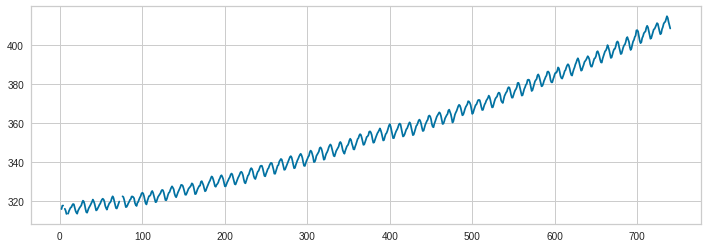

In [192]:
co2["co2"].plot(figsize=(12,4))

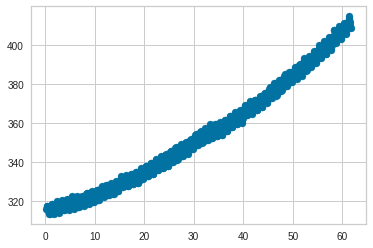

In [193]:
plt.scatter(co2["time"],co2["co2"],alpha = 1)

plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efddae686d0>,
      dtype=object)

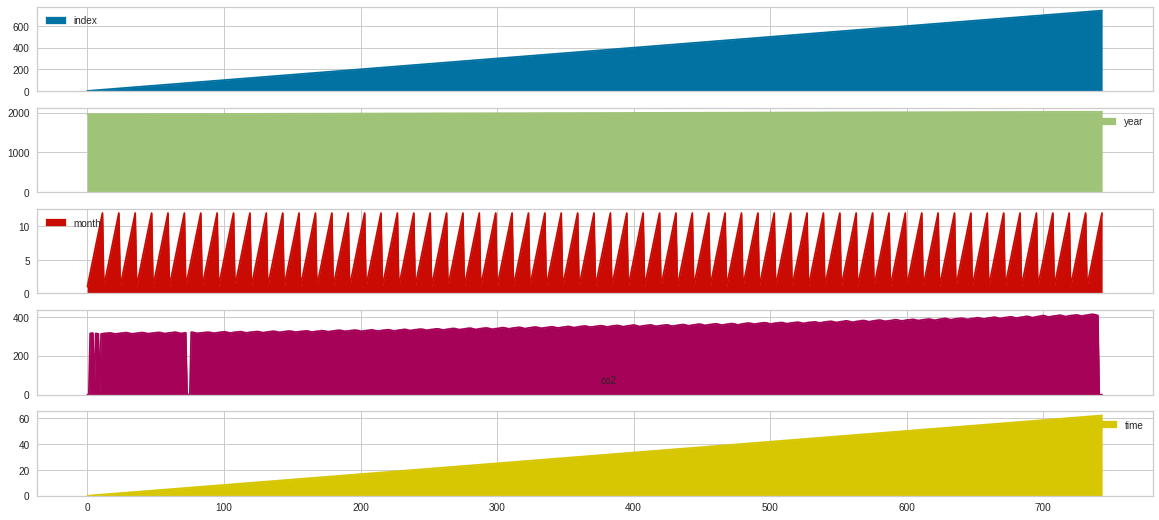

In [194]:
co2.plot.area(figsize=(20, 9), subplots=True)

In [195]:
mask = np.random.rand(len(co2))<0.8
train = co2[mask]
test = co2[~mask]
co2.replace([np.inf, -np.inf], np.nan, inplace=True)
co2.fillna(999, inplace=True)

In [196]:
train = train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
test = test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [197]:
from sklearn import linear_model
regression = linear_model.LinearRegression()
x = np.asanyarray(train[['time','year']])
y = np.asanyarray(train["co2"])
# fit the model
regression.fit(x,y)
print("coefficients",regression.coef_) 

coefficients [0.270376   1.49544448]


In [199]:
# coefficients [-1.08542898e+12  1.08542898e+12  9.04524149e+10]

In [205]:

x_test = np.asanyarray(test[["time","year"]])
y_test = np.asanyarray(test["co2"])
# y_pred = regression.predict(test[['co2']])
# error = np.mean((y_pred-y)** 2)
print("Residual sum of squares",error)

Residual sum of squares 314188.4357851393


In [ ]:
|df = df.drop([0:52], axis=0, inplace=True)


In [207]:
# sklearn.metrics.mean_squared_error(y, y_test, sample_weight=None, multioutput='uniform_average', squared=True)